In [11]:
import numpy as np
import pickle
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from datafilereader import DataFileReader
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

folder = "./dataset"

labels = ["unknown", "5_CTS", "10_CTS", "20_CTS", "50_CTS", "1_CHF", "2_CHF", "5_CHF"]

In [12]:
#load the training set
with open('dataset/trainingset.pkl', 'rb') as f:
    X, Y = pickle.load(f)

In [13]:
#train the SVM model using sikit-learn library
nu = 0.001
clf = svm.OneClassSVM(kernel='rbf', gamma='scale', nu=nu)
model = clf.fit(X)

#save the model
with open("models/modelOneVsAll.pkl","wb+") as f:
    pickle.dump(model, f)

In [14]:
#test prediction with validation set
#load the validation set
with open('dataset/validset_foreign.pkl', 'rb') as f:
    X_valid, Y_valid = pickle.load(f)


Y_pred = model.predict(X_valid)

Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      0.84      0.91        37
         1.0       0.79      1.00      0.88        23

    accuracy                           0.90        60
   macro avg       0.90      0.92      0.90        60
weighted avg       0.92      0.90      0.90        60

Confusion Matrix:
 [[31  6]
 [ 0 23]]


<Figure size 640x480 with 0 Axes>

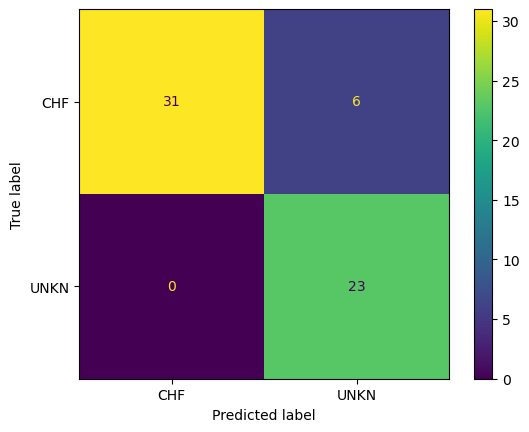

In [15]:

#results
accuracy = accuracy_score(Y_valid, Y_pred)
print(f"Accuracy: {accuracy}")

#classification report
report = classification_report(Y_valid, Y_pred)
print("Classification Report:\n", report)

#confusion matrix
conf_matrix = confusion_matrix(Y_valid, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure()
ConfusionMatrixDisplay(conf_matrix,display_labels=["CHF","UNKN"]).plot()

Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      0.92      0.96        13
         1.0       0.96      1.00      0.98        27

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40

Confusion Matrix:
 [[12  1]
 [ 0 27]]


<Figure size 640x480 with 0 Axes>

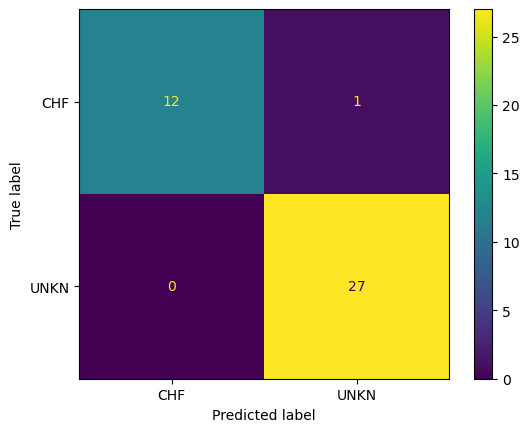

In [16]:
#load the test set
with open('dataset/testset_foreign.pkl', 'rb') as f:
    X_test, Y_test = pickle.load(f)


Y_pred = model.predict(X_test)
#results
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

#classification report
report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report)

#confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure()
ConfusionMatrixDisplay(conf_matrix,display_labels=["CHF","UNKN"]).plot()